This file is where I got my ideas toghether for a file updater, there are some nice bits and pieces in here.  Ultimately I will republish the useful bits as a straight .py file maybe as a package, or just a collection of functions.

In [1]:
import numpy as np
import pandas as pd
import os
import re

import requests
from bs4 import BeautifulSoup # To scrape data

In [2]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [3]:
import unittest

import logging
logging.basicConfig(level=logging.DEBUG,
                    format=' %(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logging.disable(0) # switched debug on. 
logging.disable(logging.DEBUG) # debug and below not reported.
# logging.disable(logging.INFO)
# logging.disable(logging.WARNING)
# logging.disable(logging.ERROR)
# logging.disable(logging.CRITICAL)

In [4]:
nemweb_url = r'http://nemweb.com.au/'
report_archive_root = r'Reports/Archive/'
report_current_root = r'Reports/Current/'
rooftop_PV_actual_root = r'ROOFTOP_PV/ACTUAL/'
rooftop_PV_forecast_root = r'ROOFTOP_PV/FORECAST/'

MMSDM_archive_url = nemweb_url + r'Data_Archive/Wholesale_Electricity/MMSDM/'

ZIPDIR_root = r'E:\Data\nemweb'

from the `not_lacie()` example at the beautiful soup documentation page: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#attrs

In [5]:
def is_year_ref(href):
    return href and re.compile('(.*\d{4}\/$)').search(href)  # a href and last 5 chars in a string are yyyy/

def is_month_zip(href):
    return href and re.compile('(.*\d{4}\_\d{2}\.zip$)').search(href)

def is_date_zip(href):
    return href and re.compile('(.*\d{8}\.zip$)').search(href)


In [6]:
def update_rooftop_solar_filecache(path_option):
    local_zip_files = list()
    
    def get_remote_archives(data_file_spec):
        url = nemweb_url + report_archive_root + data_file_spec
        try: 
            r = requests.get(url)
            if r.ok: return [re.compile('.*\/(.*\d{8}\.zip$)').match(item['href'])[1] 
                             for item in BeautifulSoup(r.text, 'html.parser').find_all(
                                 href=is_date_zip)]
        except: 
            logger.critical('cannot get to url: %s', url)
            return None    
    
#     for path_option in [rooftop_PV_forecast_root, rooftop_PV_actual_root]: 
    if not os.path.exists(os.path.join(ZIPDIR_root, path_option)):
        os.makedirs(os.path.join(ZIPDIR_root, path_option))

    archive_list = get_remote_archives(path_option)
    logger.debug('Remote archive %s%s%s file list:\n%s\n', 
                 nemweb_url, report_archive_root, path_option, archive_list)

    for file in archive_list:
        file_local = os.path.join(ZIPDIR_root, path_option, file)

        if not os.path.exists(file_local):
            file_url = nemweb_url + report_archive_root + path_option + file
            logger.info('fetching:\n`%s`', file_url)
            r = requests.get(file_url, stream=True) # stream=True as data is big
            with open(file_local, 'wb') as f:
                for chunk in r.iter_content(chunk_size=2048): # Over 2gig of data, need to stream it in chunks
                    if chunk: f.write(chunk) # filter out keep-alive new chunks
            logger.info('\n%s - saved locally\n\n', file_local)
        else: logger.info('\n%s - already downloaded', file_local)
        
    return archive_list        

forecast_PV_file_list = update_rooftop_solar_filecache(rooftop_PV_forecast_root)
actual_PV_file_list = update_rooftop_solar_filecache(rooftop_PV_actual_root)

logger.info('all files cached:\n%s', forecast_PV_file_list + actual_PV_file_list)

 2018-07-31 09:25:43,680 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170622.zip - already downloaded
 2018-07-31 09:25:43,686 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170629.zip - already downloaded
 2018-07-31 09:25:43,688 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170706.zip - already downloaded
 2018-07-31 09:25:43,690 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170713.zip - already downloaded
 2018-07-31 09:25:43,692 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170720.zip - already downloaded
 2018-07-31 09:25:43,694 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170727.zip - already downloaded
 2018-07-31 09:25:43,696 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTOP_PV_FORECAST_20170803.zip - already downloaded
 2018-07-31 09:25:43,698 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/FORECAST/PUBLIC_ROOFTO

 2018-07-31 09:25:43,856 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170810.zip - already downloaded
 2018-07-31 09:25:43,857 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170817.zip - already downloaded
 2018-07-31 09:25:43,859 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170824.zip - already downloaded
 2018-07-31 09:25:43,860 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170831.zip - already downloaded
 2018-07-31 09:25:43,861 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170907.zip - already downloaded
 2018-07-31 09:25:43,862 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170914.zip - already downloaded
 2018-07-31 09:25:43,865 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170921.zip - already downloaded
 2018-07-31 09:25:43,866 - INFO - 
E:\Data\nemweb\ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_20170928.zip - alr

['PUBLIC_ROOFTOP_PV_FORECAST_20170622.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170629.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170706.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170713.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170720.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170727.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170803.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170810.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170817.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170824.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170831.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170907.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170914.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170921.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20170928.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171005.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171012.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171019.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171026.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171102.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171109.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171116.zip', 'PUBLIC_ROOFTOP_PV_FORECAST_20171123.zip', 'PUBLIC_RO

the code below focussess on establishing a dictionary of dataframes for each available forecast:
the dictionary key is the datetime code as a pd.datetime object/type or just a number in YYYYMMDDHHMM format does it really matter?  

from there we can do some analysis on each data frame, the goal here is to just get to the data!

loading stuff in like this takes a long time and as Peter said: "I'm not going to need it" so make it recursive.
I think the best thing is to get the two file lists make a dictionary with empty data frames associated with the keys, if the key needs to be populated then do what needs to be done to populate it and chache it for the time of running the file. 


In [7]:
from zipfile import ZipFile
import io

CONTIGUOUS_PV_FORECAST_DATA_DICT = dict()
CONTIGUOUS_PV_ACTUAL_DATA_DICT = dict()

pv_forecast_archive_flst = os.listdir(os.path.join(ZIPDIR_root, rooftop_PV_forecast_root))
pv_actual_archive_flst = os.listdir(os.path.join(ZIPDIR_root, rooftop_PV_actual_root))

In [8]:
logger.info('About to load keys for forecasts')
for f in pv_forecast_archive_flst:
    logger.info('loading %s', f)
    with ZipFile(os.path.join(ZIPDIR_root, rooftop_PV_forecast_root, f), 'r') as top_level_zip:
        internal_zip_flnms = top_level_zip.namelist()
        for f in internal_zip_flnms:
            key = re.findall('.*(\d{12})\d{2}\_\d*\.zip$', f)[0]
            logger.debug(key)
            CONTIGUOUS_PV_FORECAST_DATA_DICT[key] = pd.DataFrame()
            
logger.info('About to load keys for actuals')
for f in pv_actual_archive_flst:
    logger.info('loading %s', f)
    with ZipFile(os.path.join(ZIPDIR_root, rooftop_PV_actual_root, f), 'r') as top_level_zip:
        internal_zip_flnms = top_level_zip.namelist()
        for f in internal_zip_flnms:
            key = re.findall('.*(\d{12})\d{2}\_\d*\.zip$', f)[0]
            logger.debug(key)
            CONTIGUOUS_PV_ACTUAL_DATA_DICT[key] = pd.DataFrame()

 2018-07-31 09:25:43,989 - INFO - About to load keys for forecasts
 2018-07-31 09:25:43,992 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170525.zip
 2018-07-31 09:25:44,005 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170601.zip
 2018-07-31 09:25:44,016 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170608.zip
 2018-07-31 09:25:44,027 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170615.zip
 2018-07-31 09:25:44,038 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170622.zip
 2018-07-31 09:25:44,048 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170629.zip
 2018-07-31 09:25:44,059 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170706.zip
 2018-07-31 09:25:44,071 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170713.zip
 2018-07-31 09:25:44,084 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170720.zip
 2018-07-31 09:25:44,094 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170727.zip
 2018-07-31 09:25:44,113 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20170803.zip
 2018-07-31 09:25:44,129 - INFO

 2018-07-31 09:25:46,525 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180301.zip
 2018-07-31 09:25:46,530 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180308.zip
 2018-07-31 09:25:46,533 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180315.zip
 2018-07-31 09:25:46,537 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180322.zip
 2018-07-31 09:25:46,545 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180329.zip
 2018-07-31 09:25:46,551 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180405.zip
 2018-07-31 09:25:46,554 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180412.zip
 2018-07-31 09:25:46,557 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180419.zip
 2018-07-31 09:25:46,562 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180426.zip
 2018-07-31 09:25:46,569 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180503.zip
 2018-07-31 09:25:46,576 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180510.zip
 2018-07-31 09:25:46,581 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180517.zip
 2018-07-31 09:25:46,584 - INFO - loadin

In [9]:
CPFDD_KEYS = list(CONTIGUOUS_PV_FORECAST_DATA_DICT.keys())
CPFDD_KEYS.sort()
CPFDD_KEYS = [pd.to_datetime(x) for x in CPFDD_KEYS]
logger.info(CPFDD_KEYS)

 2018-07-31 09:25:47,799 - INFO - [Timestamp('2017-05-25 01:30:00'), Timestamp('2017-05-25 07:30:00'), Timestamp('2017-05-25 13:30:00'), Timestamp('2017-05-25 19:30:00'), Timestamp('2017-05-26 01:30:00'), Timestamp('2017-05-26 07:30:00'), Timestamp('2017-05-26 13:30:00'), Timestamp('2017-05-26 19:30:00'), Timestamp('2017-05-27 01:30:00'), Timestamp('2017-05-27 07:30:00'), Timestamp('2017-05-27 13:30:00'), Timestamp('2017-05-27 19:30:00'), Timestamp('2017-05-28 01:30:00'), Timestamp('2017-05-28 07:30:00'), Timestamp('2017-05-28 13:30:00'), Timestamp('2017-05-28 19:30:00'), Timestamp('2017-05-29 01:30:00'), Timestamp('2017-05-29 07:30:00'), Timestamp('2017-05-29 13:30:00'), Timestamp('2017-05-29 19:30:00'), Timestamp('2017-05-30 01:30:00'), Timestamp('2017-05-30 07:30:00'), Timestamp('2017-05-30 13:30:00'), Timestamp('2017-05-30 19:30:00'), Timestamp('2017-05-31 01:30:00'), Timestamp('2017-05-31 07:30:00'), Timestamp('2017-05-31 13:30:00'), Timestamp('2017-05-31 19:30:00'), Timestamp('20

In [10]:
key_list = list(CONTIGUOUS_PV_FORECAST_DATA_DICT.keys())
key_list.sort()
CPVFFL_KEYS = [pd.to_datetime(re.findall('.*(\d{8})\.zip', x)[0]) for x in pv_forecast_archive_flst]
logger.info("%s", CPVFFL_KEYS)
CPVFD_KEYS = [pd.to_datetime(x) for x in key_list]
logger.info("%s", CPVFD_KEYS)

 2018-07-31 09:25:47,959 - INFO - [Timestamp('2017-05-25 00:00:00'), Timestamp('2017-06-01 00:00:00'), Timestamp('2017-06-08 00:00:00'), Timestamp('2017-06-15 00:00:00'), Timestamp('2017-06-22 00:00:00'), Timestamp('2017-06-29 00:00:00'), Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-13 00:00:00'), Timestamp('2017-07-20 00:00:00'), Timestamp('2017-07-27 00:00:00'), Timestamp('2017-08-03 00:00:00'), Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-17 00:00:00'), Timestamp('2017-08-24 00:00:00'), Timestamp('2017-08-31 00:00:00'), Timestamp('2017-09-07 00:00:00'), Timestamp('2017-09-14 00:00:00'), Timestamp('2017-09-21 00:00:00'), Timestamp('2017-09-28 00:00:00'), Timestamp('2017-10-05 00:00:00'), Timestamp('2017-10-12 00:00:00'), Timestamp('2017-10-19 00:00:00'), Timestamp('2017-10-26 00:00:00'), Timestamp('2017-11-02 00:00:00'), Timestamp('2017-11-09 00:00:00'), Timestamp('2017-11-16 00:00:00'), Timestamp('2017-11-23 00:00:00'), Timestamp('2017-11-30 00:00:00'), Timestamp('20

In [11]:
def get_index(dtime, dtime_list):
    if dtime < dtime_list[0]: 
        logger.error('no forecasts available for datetime %s, next forecast %s', dtime, dtime_list[0])
        return -1
    mask = [t <= dtime for t in dtime_list]
    for i, x in enumerate(mask[:-1]):
        if x != mask[i+1]: 
            return dtime_list[i]
    logger.error('last forecast may be available for datetime %s, last forecast %s', dtime, dtime_list[-1]) 
    return -1

datetime_2_key = lambda dtime:str(dtime.minute + 
                                  100*(dtime.hour + 
                                       100*(dtime.day + 
                                            100*(dtime.month + 
                                                 100*dtime.year))))

In [12]:
def load_forecast_file(date_time):
    pass

def get_forecast_df(date_time):
    df = CONTIGUOUS_PV_FORECAST_DATA_DICT[datetime_2_key(date_time)]
    if df.isnull:
        load_forecast_file(date_time)
    
    return df 

_ = get_forecast_df(pd.to_datetime("2018-05-01 07:30"))

In [32]:
from zipfile import ZipFile, ZipInfo
import io

pv_frcst_arch_flst = os.listdir(os.path.join(ZIPDIR_root, rooftop_PV_forecast_root))
# pv_forcst_arch_dtlst = [re.compile('.*(\d{8})\.zip$').match(item)[1] 
#                                   for item in pv_forcst_arch_flst]

def get_all_p_dfs_from_zip(file_spec, file_type):
    output_dict = dict()
    with ZipFile(os.path.join(ZIPDIR_root, file_type, file_spec), 'r') as top_level_zip:
        logger.debug(top_level_zip.namelist())
        for internal_zip_il in top_level_zip.infolist():
            logger.debug(internal_zip_il)
            with ZipFile(io.BytesIO(top_level_zip.read(internal_zip_il))) as interal_zip:
                internal_csv = interal_zip.infolist()[0]
                logger.debug(internal_csv.filename)
                
                df_in = pd.read_csv(interal_zip.open(internal_csv.filename), 
                                    skiprows=[0], header='infer', encoding='ansi')
                df_in = df_in[:-1] # get rid of the last line
                df_in.drop(labels=df_in.columns[0:5], axis=1, inplace=True)
                df_in.drop(labels=df_in.columns[-1], axis=1, inplace=True)
                df_in['INTERVAL_DATETIME'] = pd.to_datetime(df_in['INTERVAL_DATETIME'])
                df_in.set_index(['REGIONID', 'INTERVAL_DATETIME'], inplace=True)
                
                dict_key = re.compile('.*(\d{12})\d{2}\_\d*\.csv$').match(internal_csv.filename)[1]
                logger.debug('%s\n%s', dict_key, df_in.head())
                output_dict[dict_key] = df_in      
    return output_dict

logger.info('About to load data')
for f in pv_frcst_arch_flst[-26:]:
    logger.info('loading %s', f)
    CONTIGUOUS_PV_FORECAST_DATA_DICT.update(get_all_p_dfs_from_zip(f, rooftop_PV_forecast_root))

logger.info('the contiguous data has %s keys', len(CONTIGUOUS_PV_FORECAST_DATA_DICT))

 2018-07-31 09:32:53,323 - INFO - About to load data
 2018-07-31 09:32:53,325 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180118.zip
 2018-07-31 09:32:55,599 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180125.zip
 2018-07-31 09:32:58,122 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180201.zip
 2018-07-31 09:33:00,248 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180208.zip
 2018-07-31 09:33:02,363 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180215.zip
 2018-07-31 09:33:04,279 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180222.zip
 2018-07-31 09:33:06,308 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180301.zip
 2018-07-31 09:33:08,295 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180308.zip
 2018-07-31 09:33:26,166 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180315.zip
 2018-07-31 09:33:48,422 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180322.zip
 2018-07-31 09:34:13,137 - INFO - loading PUBLIC_ROOFTOP_PV_FORECAST_20180329.zip
 2018-07-31 09:34:36,989 - INFO - loading PUB

In [18]:
pv_act_arch_flst = os.listdir(os.path.join(ZIPDIR_root, rooftop_PV_actual_root))
# pv_forcst_arch_dtlst = [re.compile('.*(\d{8})\.zip$').match(item)[1] 
#                                   for item in pv_forcst_arch_flst]

def get_all_a_dfs_from_zip(file_spec, file_type):
    output_dict = dict()
    with ZipFile(os.path.join(ZIPDIR_root, file_type, file_spec), 'r') as top_level_zip:
        logger.debug(top_level_zip.namelist())
        for internal_zip_il in top_level_zip.infolist():
            logger.debug(internal_zip_il)
            with ZipFile(io.BytesIO(top_level_zip.read(internal_zip_il))) as interal_zip:
                internal_csv = interal_zip.infolist()[0]
                logger.debug(internal_csv.filename)
                
                df_in = pd.read_csv(interal_zip.open(internal_csv.filename), 
                                    skiprows=[0], header='infer', encoding='ansi')
                df_in = df_in[:-1] # get rid of the last line
                df_in.drop(labels=df_in.columns[0:4], axis=1, inplace=True)
                df_in.drop(labels=df_in.columns[-1], axis=1, inplace=True)
                df_in['INTERVAL_DATETIME'] = pd.to_datetime(df_in['INTERVAL_DATETIME'])
                df_in.set_index(['REGIONID', 'INTERVAL_DATETIME'], inplace=True)
                
                dict_key = re.compile('.*(\d{12})\d{2}\_\d*\.csv$').match(internal_csv.filename)[1]
                logger.debug('%s\n%s', dict_key, df_in.head())
                output_dict[dict_key] = df_in      
    return output_dict

logger.info('About to load data')
for f in pv_act_arch_flst[-26:]:
    logger.info('loading %s', f)
    CONTIGUOUS_PV_ACTUAL_DATA_DICT.update(get_all_a_dfs_from_zip(f, rooftop_PV_actual_root))

 2018-07-31 09:26:29,096 - INFO - About to load data
 2018-07-31 09:26:29,097 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180118.zip
 2018-07-31 09:26:29,484 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180125.zip
 2018-07-31 09:26:29,856 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180201.zip
 2018-07-31 09:26:30,228 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180208.zip
 2018-07-31 09:26:30,617 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180215.zip
 2018-07-31 09:26:31,027 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180222.zip
 2018-07-31 09:26:31,421 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180301.zip
 2018-07-31 09:26:31,797 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180308.zip
 2018-07-31 09:26:32,155 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180315.zip
 2018-07-31 09:26:32,503 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180322.zip
 2018-07-31 09:26:32,887 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_20180329.zip
 2018-07-31 09:26:33,278 - INFO - loading PUBLIC_ROOFTOP_PV_ACTUAL_

In [19]:
logger.info('the contiguous data has %s keys', len(CONTIGUOUS_PV_ACTUAL_DATA_DICT))

 2018-07-31 09:26:50,793 - INFO - the contiguous data has 420 keys


In [20]:
logger.info(CONTIGUOUS_PV_ACTUAL_DATA_DICT.keys())

 2018-07-31 09:26:51,810 - INFO - dict_keys(['201705250000', '201705260000', '201705270000', '201705280000', '201705290000', '201705300000', '201705310000', '201706010000', '201706020000', '201706030000', '201706040000', '201706050000', '201706060000', '201706070000', '201706080000', '201706090000', '201706100000', '201706110000', '201706120000', '201706130000', '201706140000', '201706150000', '201706160000', '201706170000', '201706180000', '201706190000', '201706200000', '201706210000', '201706220000', '201706230000', '201706240000', '201706250000', '201706260000', '201706270000', '201706280000', '201706290000', '201706300000', '201707010000', '201707020000', '201707030000', '201707040000', '201707050000', '201707060000', '201707070000', '201707080000', '201707090000', '201707100000', '201707110000', '201707120000', '201707130000', '201707140000', '201707150000', '201707160000', '201707170000', '201707180000', '201707190000', '201707200000', '201707210000', '201707220000', '2017072300

because time is the enemy here I have to just load the actual solar data and thern do a comparison:

the latest data is in the following director

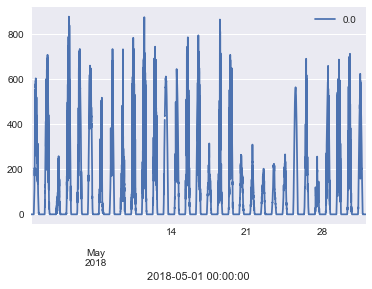

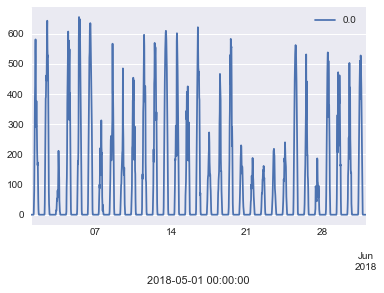

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2018-05-01 00:30:00 to 2018-06-01 00:00:00
Freq: 30T
Data columns (total 1 columns):
0.0    1488 non-null float64
dtypes: float64(1)
memory usage: 23.2 KB


In [33]:
SOLAR_DATA_DIR = 'E:\Data\1min Solar\023034'

raw_solar_ghi = pd.read_csv('./data/2018-05-may-1minute-Global.csv', index_col=0, infer_datetime_format=True)
raw_solar_ghi.index = pd.to_datetime(raw_solar_ghi.index)
raw_solar_ghi.plot()
plt.show()

solar_ghi = raw_solar_ghi.resample('30T', label='right').mean()
solar_ghi.plot()
plt.show()
solar_ghi.info()

Now just get the forecast dataframe for say 0730 on May the first, because we know it exists not going searchn for it.

In [34]:
from bokeh.plotting import figure
from bokeh.io import output_file, show

dt_range = pd.date_range(start='2018-05-01', end='2018-06-01', freq='D')

roof_pv = pd.DataFrame()
for date in dt_range:
    roof_pv = roof_pv.append(CONTIGUOUS_PV_ACTUAL_DATA_DICT[datetime_2_key(date)])

roof_pv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7680 entries, (NSW1, 2018-04-30 00:30:00) to (VIC1, 2018-06-01 00:00:00)
Data columns (total 3 columns):
POWER    7680 non-null float64
QI       7680 non-null float64
TYPE     7680 non-null object
dtypes: float64(2), object(1)
memory usage: 214.7+ KB


In [35]:
sa_rpv = roof_pv.loc['SA1']
sa_rpv.index = pd.to_datetime(sa_rpv.index)
sa_rpv['GHI'] = solar_ghi.loc[sa_rpv.index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


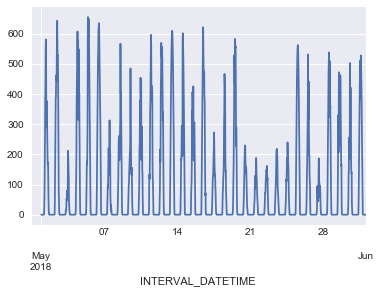

In [36]:
sa_rpv['GHI'].plot(); plt.show()

In [37]:
p = figure(x_axis_label='date and time', y_axis_label='Solar Ouptuts')
p.x(sa_rpv.index, sa_rpv.GHI, color='blue')
p.line(sa_rpv.index, sa_rpv.GHI, color='blue')
p.circle(sa_rpv.index, sa_rpv.POWER, color='green')
p.line(sa_rpv.index, sa_rpv.POWER, color='green')
# p.x(sa_rpv.index, sa_rpv.POWERPOE50, color='red')
# p.line(sa_rpv.index, sa_rpv.POWERPOE50, color='red')
output_file('check_times.html')
show(p)

 2018-07-31 09:46:34,670 - INFO - Session output file 'check_times.html' already exists, will be overwritten.


In [28]:
q = figure(x_axis_label='BOM GHI', y_axis_label='NEM')
# q.circle(sa_rpv.GHI, sa_rpv.POWERMEAN, alpha=0.3, color='black')
q.circle(sa_rpv.GHI, sa_rpv.POWER, alpha=0.2, color='green')
output_file('scatters.html')
show(q)

 2018-07-31 09:27:13,971 - INFO - Session output file 'scatters.html' already exists, will be overwritten.


In [29]:
sa_rpv[['GHI', 'POWER']].to_csv('./data/GHI-NEMPV.csv')

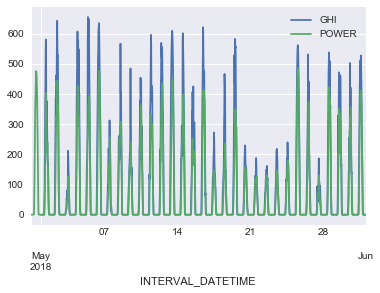

In [30]:
sa_rpv[['GHI', 'POWER']].plot()
plt.show()

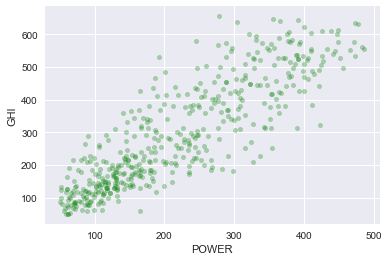

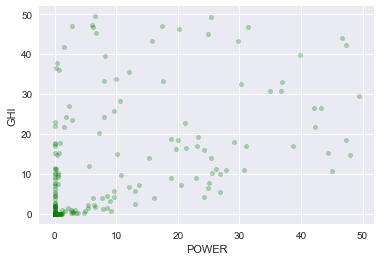

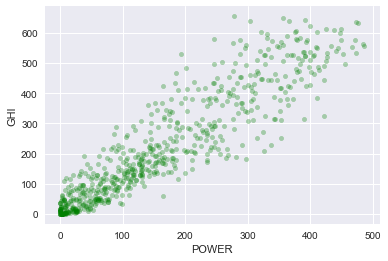

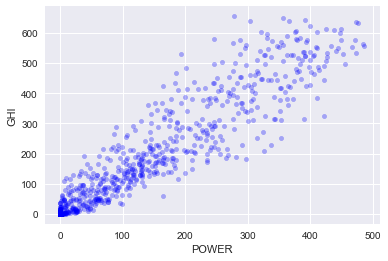

In [38]:
sa_rpv[(sa_rpv.GHI > 50.0) & (sa_rpv.POWER > 50.0)].plot(kind='scatter', y='GHI', x='POWER', color='green', alpha=0.3)
sa_rpv[(sa_rpv.GHI < 50.0) & (sa_rpv.POWER < 50.0)].plot(kind='scatter', y='GHI', x='POWER', color='green', alpha=0.3)
sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)].plot(kind='scatter', y='GHI', x='POWER', color='green', alpha=0.3)
sa_rpv[['GHI', 'POWER']].plot(kind='scatter', y='GHI', x='POWER', color='blue', alpha=0.3)
plt.show()

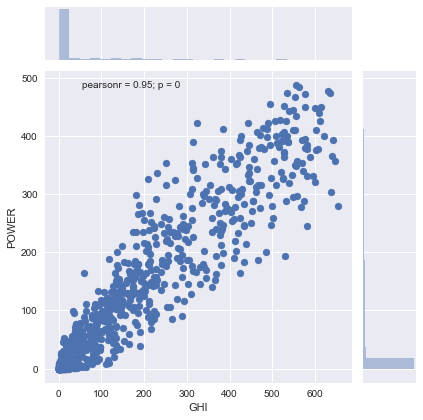

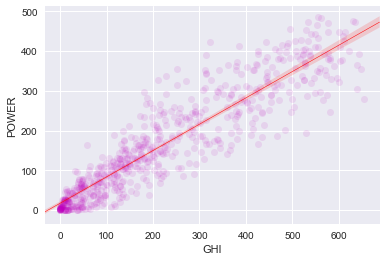

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


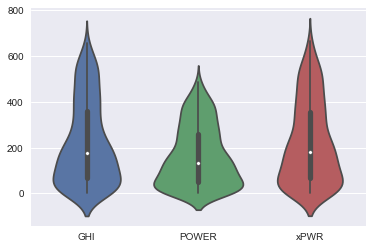

In [39]:
import seaborn as sns

sns.jointplot(x='GHI', y='POWER', data=sa_rpv[(sa_rpv.GHI >= 0.0) & (sa_rpv.POWER >= 0.0)])
plt.show()
sns.regplot(x='GHI', y='POWER', data=sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)], color='m', 
           scatter_kws={'alpha':0.1},
           line_kws={'color':'red', 'lw':0.5})
plt.show()

sa_rpv['xPWR'] = sa_rpv.POWER / 0.73
sns.violinplot(data=sa_rpv[['GHI', 'POWER', 'xPWR']][(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


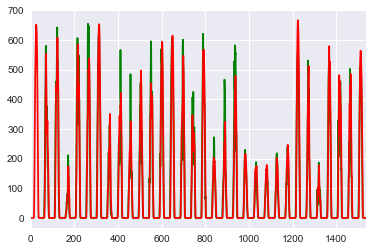

In [40]:
sns.tsplot(data=sa_rpv['GHI'], color='g')
sns.tsplot(data=sa_rpv['xPWR'], color='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


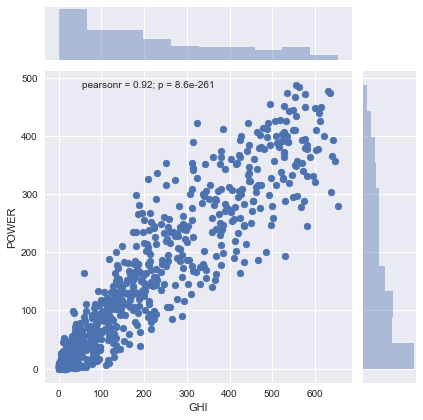

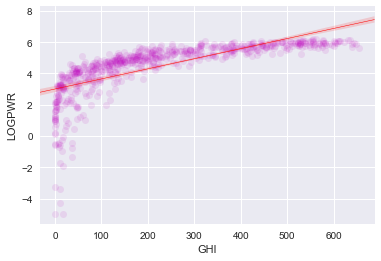

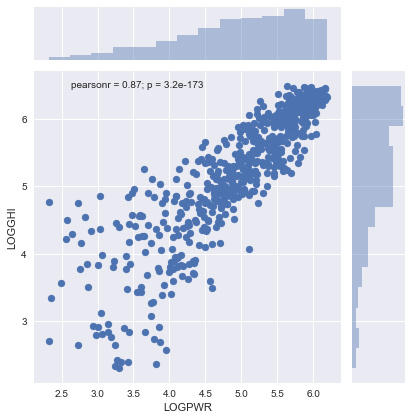

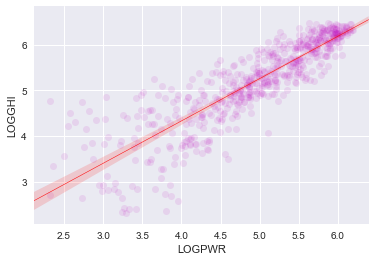

In [41]:
import seaborn as sns

sa_rpv['LOGPWR'] = np.log(sa_rpv[sa_rpv.POWER > 0.0].POWER)
sa_rpv['LOGGHI'] = np.log(sa_rpv[sa_rpv.GHI > 0.0].GHI)

sns.jointplot(x='GHI', y='POWER', data=sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)])
plt.show()
sns.regplot(x='GHI', y='LOGPWR', data=sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)], 
            color='m',
            scatter_kws={'alpha':0.1},
            line_kws={'color':'red', 'lw':0.5})
plt.show()


sns.jointplot(y='LOGGHI', x='LOGPWR', data=sa_rpv[(sa_rpv.GHI > 10.0) & (sa_rpv.POWER > 10.0)])
plt.show()

sns.regplot(y='LOGGHI', x='LOGPWR', data=sa_rpv[(sa_rpv.GHI > 10.0) & (sa_rpv.POWER > 10.0)], 
            color='m',
            scatter_kws={'alpha':0.1},
            line_kws={'color':'red', 'lw':0.5})
plt.show()

In [42]:
from scipy.stats import linregress

lr = linregress(sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)].GHI.get_values(), 
               sa_rpv[(sa_rpv.GHI > 0.0) & (sa_rpv.POWER > 0.0)].POWER.get_values())
logger.info(lr)

 2018-07-31 09:48:29,406 - INFO - LinregressResult(slope=0.66374517184037152, intercept=16.737880128990241, rvalue=0.91647697619176571, pvalue=8.5853462778308456e-261, stderr=0.011365225187007758)


In [44]:
dates_range = pd.date_range(start='2018-05-01 07:30', end='2018-05-01 08:30', freq='30T')

In [45]:
min_to_ns = lambda min: min*60*1000000000
timedelta_days = lambda days: pd.to_timedelta(min_to_ns(days*24*60))

In [46]:
def get_forecast_df(time_window_range, region):
    rtn_df = pd.DataFrame()
    global CONTIGUOUS_PV_FORECAST_DATA_DICT
    
    # the offsets seem to ensure there is at least one month in 
    # the timeRange list
    startTime = time_window_range[0] - pd.to_timedelta(timedelta_days(1))
    endTime = time_window_range[-1] + pd.to_timedelta(timedelta_days(1))
    timeRange =  pd.date_range(start=startTime, end=endTime, freq='D')
        
    logger.debug('looking for pv forecast for %s', region)
    logger.debug('ranging from %s to %s', startTime, endTime)
    logger.debug('months from %s to %s', startTime.month, endTime.month)
    logger.debug('range data is\n%s', timeRange)
    
    start_time_tag = datetime_2_key(get_index(startTime, CPFDD_KEYS))
    
    logger.info('initially getting data for: %s', start_time_tag)

    # just going to assume that I need the one file for now:
    if CONTIGUOUS_PV_FORECAST_DATA_DICT[start_time_tag].isnull:
        # get the data filled:
        pass
    else: rtn_df = CONTIGUOUS_PV_FORECAST_DATA_DICT[start_time_tag]
        
#     for ymt_tag in year_month_tags:
#         if (ymt_tag) not in CONTIGUOUS_DATA_DICT[data_spec]:
#             tmp_tag_df = get_dataframe_from_zip(file_spec, yyyy, mm)
#             tmp_tag_df = refine_data(tmp_tag_df, data_spec, field)
#             CONTIGUOUS_DATA_DICT[data_spec][ymt_tag] = tmp_tag_df
#         else: tmp_tag_df = CONTIGUOUS_DATA_DICT[data_spec][ymt_tag]
#         rtn_df = rtn_df.append(tmp_tag_df)
        
#     logger.debug('\n%s', rtn_df.loc[region])
    return None
    return rtn_df.loc[startTime:endTime, region]

In [47]:
def get_PV_forecast(startTime, numberOfIntervals, regionId='SA1'):
    logger.info('looking for %s intervals starting at %s in %s', numberOfIntervals, startTime, regionId)
    forecast_range = pd.date_range(start=startTime, 
                                   periods=numberOfIntervals, freq='30T')
    forecastPV = get_forecast_df(forecast_range, regionId)

#     logger.debug('forecasts\n%s', forecastPV.loc[startTime])    
    return forecastPV


In [ ]:
horizonIntervals = 3*24*2 # 3 days by 24 hours/day by 2 intervals/hour

dt_range = pd.date_range(start='2017-10-13 15:30', end='2018-01-31 23:30:00', freq='30T')
dt_range = pd.date_range(start='2017-10-13 15:30', end='2017-10-13 16:30', freq='30T')
for t in dt_range:
    get_PV_forecast(t, horizonIntervals, regionId='SA1' )
    

In [57]:
a_forecast = get_PV_forecast(pd.to_datetime('2017-12-01 '), 7*48, regionId='SA1' )

 2018-07-31 09:56:40,705 - INFO - looking for 336 intervals starting at 2017-12-01 00:00:00 in SA1
 2018-07-31 09:56:40,710 - INFO - initially getting data for: 201711291930


In [66]:
list(CONTIGUOUS_PV_FORECAST_DATA_DICT.keys())[-5:]

['201807182130',
 '201807182200',
 '201807182230',
 '201807182300',
 '201807182330']

In [75]:
CONTIGUOUS_PV_FORECAST_DATA_DICT['201805010000'].loc['SA1', 'POWERMEAN'].to_csv('./data/NEM_Forecast.csv')

In [50]:
dt_range = pd.date_range(start='2017-10-13 15:30', end='2018-01-31 23:30:00', freq='30T')
dt_range = pd.date_range(start='2017-10-13 15:30', end='2017-10-13 23:30', freq='30T')
for t in dt_range:
    logger.info('%s is at or after index %s ', t, get_index(t, CPFDD_KEYS))
    logger.info('using key %s', datetime_2_key(get_index(t, CPFDD_KEYS)))
    

 2018-07-31 09:50:28,019 - INFO - 2017-10-13 15:30:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,025 - INFO - using key 201710131330
 2018-07-31 09:50:28,031 - INFO - 2017-10-13 16:00:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,035 - INFO - using key 201710131330
 2018-07-31 09:50:28,040 - INFO - 2017-10-13 16:30:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,046 - INFO - using key 201710131330
 2018-07-31 09:50:28,051 - INFO - 2017-10-13 17:00:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,057 - INFO - using key 201710131330
 2018-07-31 09:50:28,061 - INFO - 2017-10-13 17:30:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,064 - INFO - using key 201710131330
 2018-07-31 09:50:28,066 - INFO - 2017-10-13 18:00:00 is at or after index 2017-10-13 13:30:00 
 2018-07-31 09:50:28,069 - INFO - using key 201710131330
 2018-07-31 09:50:28,071 - INFO - 2017-10-13 18:30:00 is at or after index 2017-10

get the forecasts from inside the files, what did I do with the other stuff, from memory I fetch the file to memory only if I don't have the forecast.

In [ ]:
# CONTIGUOUS_PV_DATA_DICT = dict()
def internal_forecast_filespec(datetimespec):
    filename_prefix = r'(.*PUBLIC_ROOFTOP_PV_FORECAST_'
    filename_postfix = r'_\d*\.zip)$'
    return filename_prefix + filespec + filename_postfix


def get_PV_df(timewindow_range, regionId):
    rtn_df = pd.DataFrame()
    global CONTIGUOUS_PV_DATA_DICT
    
    startTime = time_window_range[0]
    endTime = time_window_range[0]
    return rtn_df
    

def get_pv_forecast(startTime, numberOfIntervals, regionId='SA1'):
    logger.info('looking for %s intervals starting at %s in %s', numberOfIntervals, startTime, regionId)

    forecast_range = pd.date_range(start=startTime, 
                                   periods=numberOfIntervals, freq='30T')
    forecast_PV_df = get_PV_df(forecast_range, regionId)
    forecast_PV_ts = forecast_PV_df.copy()
    return forecast_PV_ts


the code above seems to do what I need: i.e. find the item in the list that I need in order to get to the appropriate zip file.  Maybe I can just do it with integers like I did it last time. 

I think I had a dictionary of files/dataframes I had already opened and all of the dataframes within that dictionary were keyed with an integer, in this case I have lots to do 

In [ ]:
logger.info(pd.to_datetime('2017-10-13 15:30').isoweekday())
logger.info(pd.to_datetime('2017-10-12 01:30').isoweekday())

In [ ]:
def get_year_urls(url):
    try: 
        r = requests.get(url)
        if r.ok: return [item['href'] for item in
                         BeautifulSoup(r.text, 'html.parser').find_all(href=is_year_ref)]
    except: 
        logger.critical('cannot get to url: %s', url)
        return None

def get_remote_zip(year_rl):
    url = nemweb_url + year_rl
    try: 
        r = requests.get(url)
        if r.ok: return [item['href'][-17:] for item in
                         BeautifulSoup(r.text, 'html.parser').find_all(href=is_month_zip)]
    except: 
        logger.critical('cannot get to url: %s', url)
        return None
    
def get_local_zip(year_rl):
    return os.listdir(os.path.join(ZIPDIR_root, year_rl[-5:-1]))

the code below needs to be tailored to the zip file structure of the solar data archive ... in real time there is no neccessity for the zip within a zip thing, as the files are just the compressed `csv`'s

In [ ]:
def find_filespec_in_zip(source_zip, search_spec):
    found_file = [re.match(search_spec, name).group(0) for name in source_zip.namelist() 
                  if re.match(search_spec, name)]
    return found_file[0] if len(found_file)==1 else None 


def get_dataframe_from_csv(source_zip, search_spec):
    """a bit of a hack here as we are guessign there is only one CSV per zip file"""
    internal_zip_name = find_filespec_in_zip(source_zip, search_spec)
    logger.debug('About to read:\n%s', internal_zip_name)
    
    try:
        zip_file_data = ZipFile(io.BytesIO(source_zip.read(internal_zip_name)))
#         dfs = {csv_f.filename: pd.read_csv(zip_file_data.open(csv_f.filename), skiprows=[0])
#                for csv_f in zip_file_data.infolist() 
#                if csv_f.filename.endswith('.CSV')}
        dfs = [pd.read_csv(zip_file_data.open(csv_f.filename), skiprows=[0])
               for csv_f in zip_file_data.infolist() 
               if csv_f.filename.endswith('.CSV')]
    
    except BadZipFile: logger.error('%s is not a zip file', internal_zip_name)
        
    return dfs[0]


def get_dataframe_from_zip(file_spec, year, month, day):
    zip_year = '{:04n}'.format(year)
    zip_month = 'MMSDM_{:04n}_{:02n}.zip'.format(year, month)
    logger.debug('looking at %s', os.path.join(zip_year, zip_month)) 
  
    try:
        top_level_zip = ZipFile(os.path.join(ZIPDIR_root, zip_year, zip_month), 'r')
        dataFrame = get_dataframe_from_csv(top_level_zip, file_spec)
        logger.debug('key:\n%s\n', file_spec)
            
    except BadZipFile: logger.error('%s is a bad zip file', os.path.join(ZIPDIR_root, zip_year, zip_month))
    
    return dataFrame

after getting the solar data from the service I now need to expunge the csv inside the csv 

looks like the archive has gotten considerably more packed around 2018-03-08, before then archives are of 0130, 0730, 1330, 1930, only then after that they become available every 30 minutes!

2018-07-11 there seems to be a problem with the code below. I cannot remember where I was up to with the code below but instead of using it I will just come up with new code to read the archive and go to the current directory as well. 

In [ ]:
def update_zips():
    remote_zip_files = list() 
    local_zip_files = list()

    for year_rl in get_year_urls(MMSDM_archive_url): 
        remote_zip_files.extend(get_remote_zip(year_rl))  
        local_zip_files.extend(get_local_zip(year_rl))    

    logger.debug('remote file names: \n%s', remote_zip_files)
    logger.debug('local file names: \n%s', local_zip_files)

    remote_file_set = set(); remote_file_set = set(remote_zip_files)
    local_file_set = set(); local_file_set = set(local_zip_files)

    missing_files = remote_file_set - local_file_set #assume there are more remotes than locals

    logger.debug('The set of missing files:\n%s', missing_files)

    for zip_file in missing_files:
        year = zip_file[6:10]
        file_url = MMSDM_archive_url+year+'/'+zip_file
        file_local = os.path.join(ZIPDIR_root, year, zip_file)
        logger.info('looking for remote:\n%s', file_url)
        logger.info('and saving to local:\n%s', file_local)

        if not os.path.exists(os.path.join(ZIPDIR_root, year)): 
            os.makedirs(os.path.join(ZIPDIR_root, year))

        # the following bits of code need to be done where there is a good data connection 
        # i.e. not at home:

        r = requests.get(file_url, stream=True) # stream=True as data is big
        with open(file_local, 'wb') as f:
            for chunk in r.iter_content(chunk_size=512): # Over 2gig of data, need to stream it in chunks
                if chunk: f.write(chunk) # filter out keep-alive new chunks

        logger.info('\n%s - saved locally', file_local)
    else: logger.info('No new files to transfer.')
        
    return None

Using the prototype `monkey see, monkey do` for unit testing from: https://stackoverflow.com/questions/37895781/unable-to-run-unittests-main-function-in-ipython-jupyter-notebook#38012249

the return code is alway going to be None, but now I can run this in stand alone, or as an integrated module.